In [1]:

import sys
import os

# Add the project root to PYTHONPATH
project_root = os.path.abspath("../../")  # adjust as needed
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(project_root)

import exp_driver.experiment as E

/data/marci/mjakowsk/EDS4AI/DeficitProject


In [14]:

params = {
    "num_epochs" : 150,
    "deficit_name": "CIFAR10SubsetDeficit"
          }

#exps = E.match_experiments(directories=['studies/subset_size/random_subset_results'],
exps_rand = E.match_experiments(directories=['../subset_size/random_subset_results'],
                           params = params)

len(exps_rand)

13

In [15]:

params = {
    "num_epochs" : 150,
    "deficit_name": "SimilarityTypeDeficit",
    "deficit_params" : {"type" : "similarity"},
          }

#exps = E.match_experiments(directories=['studies/subset_size/random_subset_results'],
exps_sim = E.match_experiments(directories=['different_size_similarity'],
                           params = params)

print(len(exps_sim))


13


In [16]:
params = {
    #"num_epochs" : 150,
    "deficit_name": "SimilarityTypeDeficit",
    "deficit_params" : {"type" : "disimilarity"},
          }

#exps = E.match_experiments(directories=['studies/subset_size/random_subset_results'],
exps_dis = E.match_experiments(directories=['different_size_disimilarity'],
                           params = params)

print(len(exps_dis))

13


<Axes: title={'center': 'Subset accuracy'}, xlabel='subset size', ylabel='accuracy'>

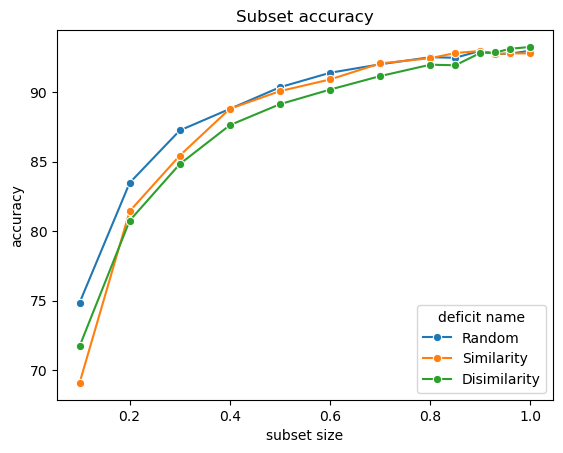

In [17]:

E.plot_all_acc_per_subset_size([exps_rand, exps_sim, exps_dis], ['Random', 'Similarity', 'Disimilarity'])

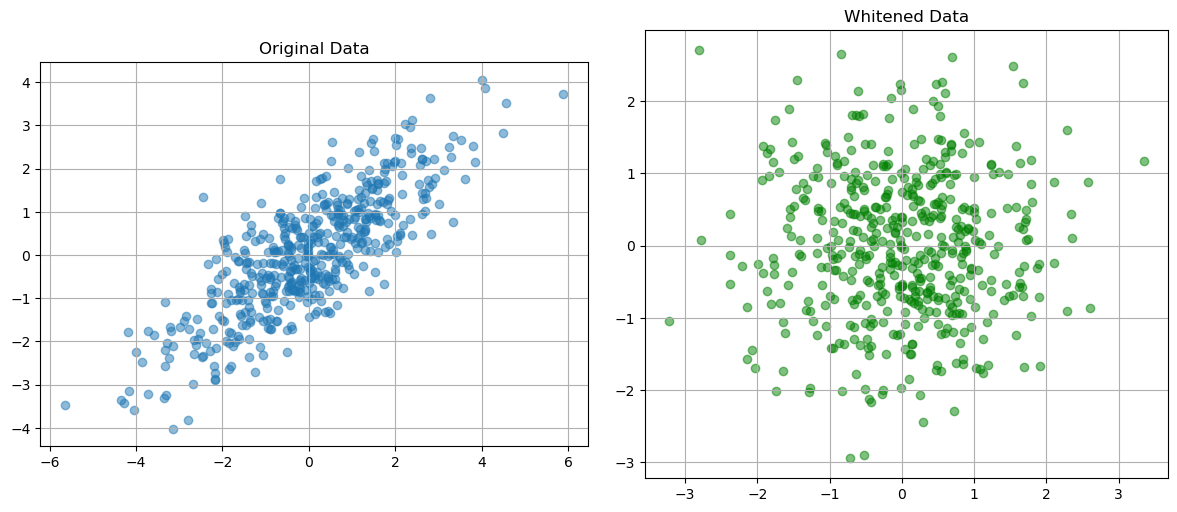

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# --- Generate some correlated 2D data ---
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2],
       [2, 2]]  # Positive semi-definite covariance matrix

data = np.random.multivariate_normal(mean, cov, size=500)

# --- Compute mean and covariance ---
mu = np.mean(data, axis=0)
sigma = np.cov(data, rowvar=False)

# --- Whitening ---
centered = data - mu
eigvals, eigvecs = np.linalg.eigh(sigma)
sigma_inv_sqrt = eigvecs @ np.diag(1.0 / np.sqrt(eigvals)) @ eigvecs.T
whitened = centered @ sigma_inv_sqrt.T

# --- Plot original and whitened data ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original
axs[0].scatter(data[:, 0], data[:, 1], alpha=0.5)
axs[0].set_title("Original Data")
axs[0].set_aspect('equal')
axs[0].grid(True)

# Whitened
axs[1].scatter(whitened[:, 0], whitened[:, 1], alpha=0.5, color='green')
axs[1].set_title("Whitened Data")
axs[1].set_aspect('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()
